In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets
#import statsmodels.api as sm
#import seaborn as sns
#import datetime
#from ydata_profiling import ProfileReport

In [5]:
file_path = r"C:\Users\daniel.s.ross\OneDrive - Accenture Federal Services\Foundations of ML\KAG_conversion_data.csv"
df = pd.read_csv(file_path)
df['Click_Rate'] = df['Clicks']/df['Impressions']

df['age_num'] = df['age'].replace(['30-34','35-39','40-44','45-49'], [1, 2, 3, 4], inplace=False)
df['gen_num'] = df['gender'].replace(['M','F'], [1, 2], inplace=False)

#df = pd.get_dummies(df, columns=['xyz_campaign_id', 'age', 'gender'], drop_first=False)

df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Rate,age_num,gen_num
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,1,1
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,1,1
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1,1
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,4,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,4,2
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,4,2
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,4,2


In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(['Click_Rate'], axis=1)
y = df['Click_Rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [7]:
#profile = ProfileReport(df, title="Sales Conversion Profile Report")
#profile.to_notebook_iframe()

In [8]:
m = LinearRegression()
m.fit(x_train[['age_num','gen_num']], y_train)

# '30-34' -> 1 // '35-39' -> 2 // '40-44' -> 3 // '45-49' -> 4
# 'M' -> 1 // 'F' -> 2

print(m.predict([[1,2]]))
print(m.predict([[2,4]]))

[0.00015023]
[0.0002853]


c:\Users\daniel.s.ross\AppData\Local\anaconda3\envs\danv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\daniel.s.ross\AppData\Local\anaconda3\envs\danv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
y_pred = m.predict(x_test[['age_num','gen_num']])

df_pred = pd.DataFrame({'age_num' : x_test['age_num'],
                        'gen_num' : x_test['gen_num'],
                        'pred_click_rate' : y_pred})

print(df_pred)

     age_num  gen_num  pred_click_rate
946        3        2         0.000210
142        3        2         0.000210
934        2        2         0.000180
625        2        1         0.000128
124        4        1         0.000188
..       ...      ...              ...
553        1        1         0.000098
852        1        2         0.000150
310        3        2         0.000210
301        2        1         0.000128
211        3        2         0.000210

[458 rows x 3 columns]


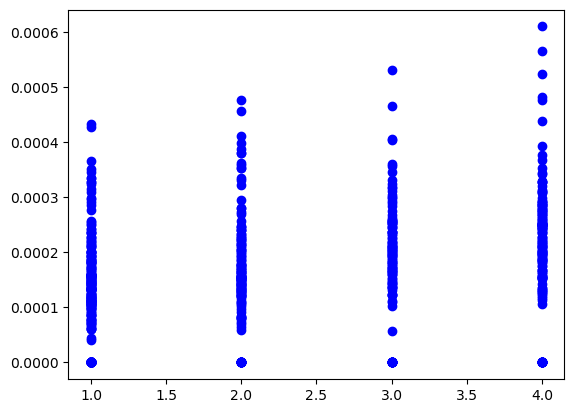

In [22]:
plt.scatter(x_train['age_num'], y_train, color="blue")
#plt.scatter(x_test['age_num'], y_test, color="red")

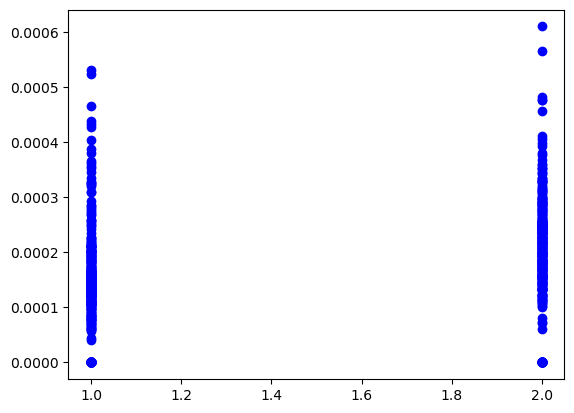

In [20]:
plt.scatter(x_train['gen_num'], y_train, color="blue")
#plt.scatter(x_test['gen_num'], y_test, color="red")

plt.show()